In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Tidal Forces

### Mass Elements in a Line

Consider Newton's 3rd law of Graviation:
$$
    F = G \frac{M_1 M_2}{r^2}
$$
When initially deriving this equation, both $M_1$ and $M_2$ were treated as point masses, as they were both assumed to be spherically symmetric. The first question we want to ask is what happens if we do not treat them as point masses?

The forces across the body will differ, because of the $1/R^2$ dependance on the force. Consider two mass elements, $m_1$ and $m_2$, within the Earth. Because of Newton's Shell theorem, both elements see would see the Moon as a point mass, but they will both feel different forces, because of their different distances to the Moon. This differentical force is known as the tidal force.

Let us set up the problem as follows: $m_1$ lies a distance $R$ from the centre of mass of a nearby body whose mass is $M$. $m_2$ is a second point mass, which lies along the line joining $m_1$ and $M$, but is slightly closer to $M$ by a distance $dr$.

![Aberration](Images/Figure_1.png)

The force exerted on $m_1$ is:
$$
    F_{m1} = G \frac{m_1 M}{r^2}
$$

The difference in the forces which $m_1$ and $m_2$, $dF_m$, can be expressed as

$$
    dF_m = \left(\frac{dF_m}{dr}\right)dr=-2G \frac{m M}{r^3}dr
$$

This is the "differentical force". It has a $1/r^3$ dependence, which is a signifcantly stronger dependance than $1/r^2$ dependance of the gravitational force.

### Mass Elements across the sphere

Ok, let's now consider the difference in forces between points located at the centre of a body, and at it's surface. Consider the following setup

![Aberration](Images/Figure_2.png)

For a test mass, $m$, located at the centre of the object on the left, then the graviational force felt due to the body on the right ($M$), is the normal gravitational force. Breaking it into it's x and y components, we have

$$
    F_C = F_{C,x} = G \frac{Mm}{r^2},\;\;\;\;\;\;\;\;\;\;\; F_{C,y} = 0
$$

Now consider a test mass, $m$, located at point $P$ on the surface of the sphere. This point lies a distance $s$ from the large body on the right. In this case, the component forces are

$$
F_{P,x} = G \frac{Mm}{s^2}\cos(\phi),\;\;\;\;\;\;\;\;\;\;\; F_{P,y} = -G \frac{Mm}{s^2}\sin(\phi)
\label{eq:vector_ray} \tag{1}
$$

The differential force is then given by

$$
\Delta {\bf F} = {\bf F_P}- {\bf F_C}=GMm\left(\frac{\cos(\phi)}{s^2}-\frac{1}{r^2}\right) {\bf \hat{i}} - G\frac{Mm}{s^2}\sin(\phi) {\bf \hat{j}}
$$

In essence, our work is now done, but there are a lot of variables in that last equation. Let's try and simplify some things. Recall the law of cosines:

$$
s^2 = R^2+r^2-2Rr\cos(\theta) = r^2\left(\frac{R^2}{r^2}+1-2\frac{R}{r}\cos(\theta)\right)
$$

Now, in most cases, $r>>R$. As such, $\frac{R^2}{r^2}<<1$, so can be neglected, giving

$$
s^2 \approx r^2\left(1-2\frac{R}{r}\cos(\theta)\right)
$$

Substituting back in above, we then have 

$$
\Delta {\bf F} = GMm\left(\frac{\cos(\phi)}{r^2\left(1-2\frac{R}{r}\cos(\theta)\right)}-\frac{1}{r^2}\right) {\bf \hat{i}} - G\frac{Mm}{r^2\left(1-2\frac{R}{r}\cos(\theta)\right)}\sin(\phi) {\bf \hat{j}}
$$

$$
\Delta {\bf F} = \frac{GMm}{r^2}\left(\frac{\cos(\phi)}{\left(1-2\frac{R}{r}\cos(\theta)\right)}-1\right) {\bf \hat{i}} - \frac{GMm}{r^2}\frac{1}{\left(1-2\frac{R}{r}\cos(\theta)\right)}\sin(\phi) {\bf \hat{j}}
$$

Noting that $r>>R$ and that $(1+x)^{-1}\approx 1-x$, we can use the substitution $\frac{1}{\left(1-2\frac{R}{r}\cos(\theta)\right)} \approx 1+2\frac{R}{r}\cos(\theta)$, we get the expression:

$$
\Delta {\bf F} = \frac{GMm}{r^2}\left[\cos(\phi)\left(1+2\frac{R}{r}\cos(\theta)\right)-1\right] {\bf \hat{i}} - \frac{GMm}{r^2}\left(1+2\frac{R}{r}\cos(\theta)\right)\sin(\phi) {\bf \hat{j}}
$$

Finally, using the small angle approxmation gives $\cos (\phi) \approx1$ and $\sin (\phi) \approx \frac{R \sin(\theta)}{r}$ we get

$$
\Delta {\bf F} = \frac{GMm}{r^2}2\frac{R}{r}\cos(\theta) {\bf \hat{i}} - \frac{GMm}{r^2}\left(1+2\frac{R\cos(\theta)}{r}\right)\frac{R \sin(\theta)}{r} {\bf \hat{j}}
$$

Excluding terms of order $\frac{R^2}{r^2}<<1$ again, we get 

$$
\Delta {\bf F} = \frac{GMmR}{r^3} 2\cos(\theta) {\bf \hat{i}} - \frac{GMmR}{r^3} \sin(\theta)  {\bf \hat{j}}
$$

$$
\Delta {\bf F} = \frac{GMmR}{r^3} (2\cos(\theta) {\bf \hat{i}} - \sin(\theta)  {\bf \hat{j}})
\label{eq:df} \tag{2}
$$

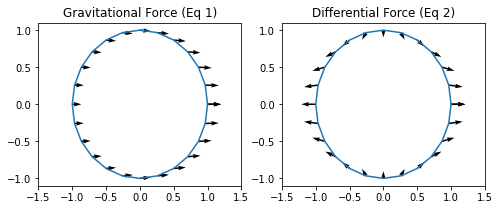

In [5]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=[8,3])
theta = np.linspace(0,2*np.pi,25)

#In the below, I've set R/r = 1/10. It's not <<0, but will suffice
#for a demo. I've also set G=M=m=1. You can add all the units if
#you wish

r = 10 #Distance between centre of body on left and body on right, r. 
R = 1 #Radius of body on left, R

x = R*np.cos(theta) #moving to cartesian coords
y = R*np.sin(theta) #moving to cartesian coords

#To calculated F at each point, we need to calculate the correct phi
s = np.sqrt(R**2+r**2-2*R*r*np.cos(theta)) #cosine rule
phi = np.arcsin(R*np.sin(theta)/(r-x))

f_x = np.cos(phi)/s**2 #Equation (1)
f_y = -np.sin(phi)/s**2 #Equation (1)

df_x = 2*R*np.cos(theta)/r**3 #Equation (2)
df_y = -R*np.sin(theta)/r**3 #Equation (2)

ax[0].plot(x,y)
ax[0].quiver(x,y,f_x,f_y)
ax[0].set_xlim(-1.5,1.5)
ax[0].set_title("Gravitational Force (Eq 1)")

ax[1].plot(x,y)
ax[1].quiver(x,y,df_x,df_y)
ax[1].set_xlim(-1.5,1.5)
ax[1].set_title("Differential Force (Eq 2)")
plt.show()

This is why we get two high tides per day. It is not the case that anything feels a force away from the moon on Earth, but just that the force on one side of the Earth is less than on the other.

### Tidal Friction

So now let's consider the effects of rotation of the body. Consider the situation below, where tidal bulges have developed at points A and B, and because of friction between the Earth's surface and the ocean, the ocean's bulges are rotated along with the Earth's surface.

![Tidal_Friction](Images/Figure_3.png)

The forces acting on the moon because of bulges A and B are shown as green arrows.

- The force due to bulge A is dominant - meaning the moon is sped up in its orbit.
- The moons force on the dial bulges acts to slow down Earth's rotation -> This is tidal friction

The Earth's rotation is slowing, ehich means there is a loss of angular momentum. However, angular momentum within the Earth-Moon system is conserved. So, **the moon must be gaining angular momentum**.

### Where does this angular momentum go?
Assume the moon (mass m) is moving in a circular orbit, of radius r. The angular momentum of the moon is then:
$$
    L=mrv
$$
To find v, let's equate the gravitational force experienced by the moon with the centripetal force
$$
    \frac{GM_{\oplus}m}{r^2}=\frac{mv}{r}\\
    v=\left(\frac{GM_{\oplus}}{r}\right) ^{1/2}
$$
This means the angular momentum is given by
$$
    L=\left(GM_{\oplus}\right)^{1/2}mr^{1/2}
$$
The first three terms are constants, so $L\propto r^{1/2}$. So if L increases (which it must if the total L of the Earth-Moon system is conserved), then r increases. Which means the Moon moves further away!

Earth's rotation is slowing at a rate of about 0.0016 s/century (small but measureable). So the moon is drifting away!

Let's now also consider the effects of the tidal forces on the Moon by the Earth.

$$
    \Delta F\sim\frac{GMmR}{r^3}
$$
Just to make sure we know what's what, $M$ is the mass of the body causing the tidal force, $R$ is the radius of the body feeling the tidal force, and $r$ is the distance between them. If we then look at the ratio of the tidal forces felt by the Moon and the Earth, we get:
$$
    \frac{M_{\oplus}R_{\rm m}}{M_{\rm m}R_{\oplus}}\sim22
$$
Tidal friction is much stronger on the Moon versus on the Earth. This means the Moons rotation slows faster than the Earths, and is why the Moon is now tidal locked into a synchronous rotation (the same side always faces us).

**Synchronous rotation** is very common - seen in binary stars, and in Sun-Mercury system.